# Customer Churn Prediction Model

## Import the required Library

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## Columns Analysis in the dataset.

In [306]:
# Column Name	Description
# customerID	Unique identifier for each customer
# gender	Customer's gender (Male/Female)
# SeniorCitizen	Whether the customer is a senior citizen (1 = Yes, 0 = No)
# Partner	Whether the customer has a partner (Yes/No)
# Dependents	Whether the customer has dependents (Yes/No)
# tenure	Number of months the customer has stayed with the company
# PhoneService	Whether the customer has a phone service (Yes/No)
# MultipleLines	Whether the customer has multiple phone lines (Yes/No/No phone service)
# InternetService	Type of internet service (DSL/Fiber optic/No)
# OnlineSecurity	Whether the customer has online security (Yes/No/No internet service)
# OnlineBackup	Whether the customer has online backup (Yes/No/No internet service)
# DeviceProtection	Whether the customer has device protection (Yes/No/No internet service)
# TechSupport	Whether the customer has tech support (Yes/No/No internet service)
# StreamingTV	Whether the customer has streaming TV service (Yes/No/No internet service)
# StreamingMovies	Whether the customer has streaming movies service (Yes/No/No internet service)
# Contract	Type of contract (Month-to-month/One year/Two year)
# PaperlessBilling	Whether the customer has opted for paperless billing (Yes/No)
# PaymentMethod	Customer's payment method (Electronic check, Mailed check, Bank transfer, Credit card)
# MonthlyCharges	Monthly amount charged to the customer
# TotalCharges	Total amount charged to the customer
# Churn	Whether the customer left the service (Yes/No)

## Data Collection Process.

In [307]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install flask
# !pip install matplotlib
# !pip install seaborn

In [308]:
# !pip install gunicorn

In [309]:
dataset = pd.read_csv("datasets/telco-churn.csv")


In [310]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [311]:
dataset.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [312]:
dataset.shape

#  we have the 64374 rows and the 12 columns.

(7043, 21)

In [313]:
pd.set_option("display.max_columns", None)
#  Sometime pandas didn't load the proper columns of our dataframe so for overcoming this we need to perform this.

In [314]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA ( Exploratory Data Analysis)

In [315]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [316]:
#  Here we categorize the columns into the categorical and the numerical.
print(dataset.select_dtypes(include=["object"]).columns)
print(dataset.select_dtypes(include="int").columns)
print(dataset.select_dtypes(include="float").columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
Index(['SeniorCitizen', 'tenure'], dtype='object')
Index(['MonthlyCharges'], dtype='object')


In [317]:
type(dataset["TotalCharges"])

pandas.core.series.Series

###  In this dataframe we have some null values but rather than the empty cell it will contain the 
### Space that makes it the string datatype feature.

### Identify columns where at least one value is just a space
columns_with_spaces = [col for col in dataset.columns if (dataset[col].astype(str).str.strip() == '').any()]
print("Columns containing only spaces as missing values:", columns_with_spaces)

In [318]:
#  Drop the id columns from the dataset.
dataset.drop(columns=["customerID"], axis=1, inplace=True)

In [319]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [320]:
#  Find the Unique value for each and every column in the dataset.
for i in dataset.select_dtypes(include="object").columns:
    print(i, dataset[i].unique())
    print('-' *  50)

#  here we have the total charges that is string but in actually it will be the float type 
#  because we only print the object type columns unique Values.

gender ['Female' 'Male']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingM

In [321]:
dataset.isnull().sum()
#  It will show that we dont have the missing value but in actually we have in the totalcharges columns

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [322]:
# dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)
#  here in this dataset we have the space rather than the NaN value 

In [323]:
dataset[dataset["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [324]:
#  Convert the space to the 0.0 string value then further into the float value.
dataset["TotalCharges"] = dataset["TotalCharges"].replace({" ": "0.0"})

In [325]:
dataset[dataset["TotalCharges"] == " "]
#  Now we dont have the space into the Total Charges so we can convert into the float

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [326]:
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)

In [327]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [328]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [329]:
no_value_count = ["tenure","TotalCharges", "MonthlyCharges"]
for i in dataset.columns:
    if i not in no_value_count:
        print(dataset[i].value_counts())
        print('-' * 50)

gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
--------------------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
--------------------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
--------------------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
--------------------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: in

In [330]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Insights till Here.
1. We will be removed the Customer ID bcoz it is not useful for analysis.
2. No missing Value into our Dataset.
3. we handle the edge case in the Total charge and replace by it to 0
4. We check the imbalance present into the target column.

## Analysis and Visualization (Numerical)

In [331]:
#  we have the imbalancing into the dataset.
dataset["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

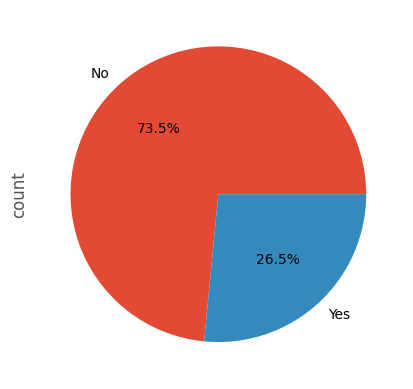

In [332]:
dataset['Churn'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [333]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [334]:
dataset.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

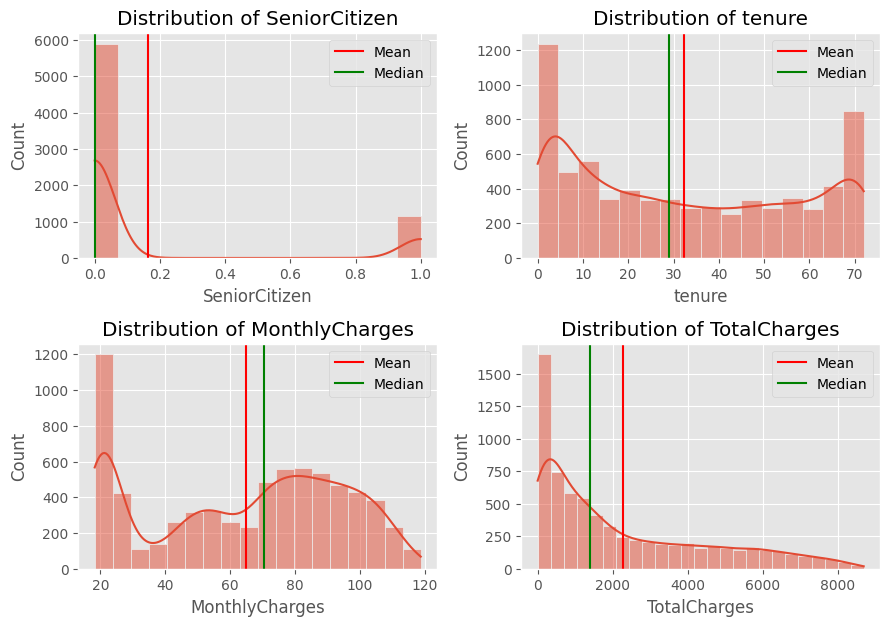

In [335]:
#  Visualize the numerical Columns.
plt.figure(figsize=(9,9))
for i, val in enumerate(dataset.describe().columns):
    plt.subplot(3,2, i + 1)
    sns.histplot(dataset[val], kde=True)
    plt.title(f"Distribution of {val}")
    plt.xlabel(val)
    plt.tight_layout()
    #  Calculate the mean and the median Value for the Column.
    col_mean = dataset[val].mean()
    col_median = dataset[val].median()
    #  Add Vertical Line for Mean and the Median.
    plt.axvline(col_mean, color = "red", linestyle = "-", label = "Mean")
    plt.axvline(col_median, color = "green", linestyle = "-", label = "Median")
    plt.legend()
    
plt.show()

In [336]:
dataset.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

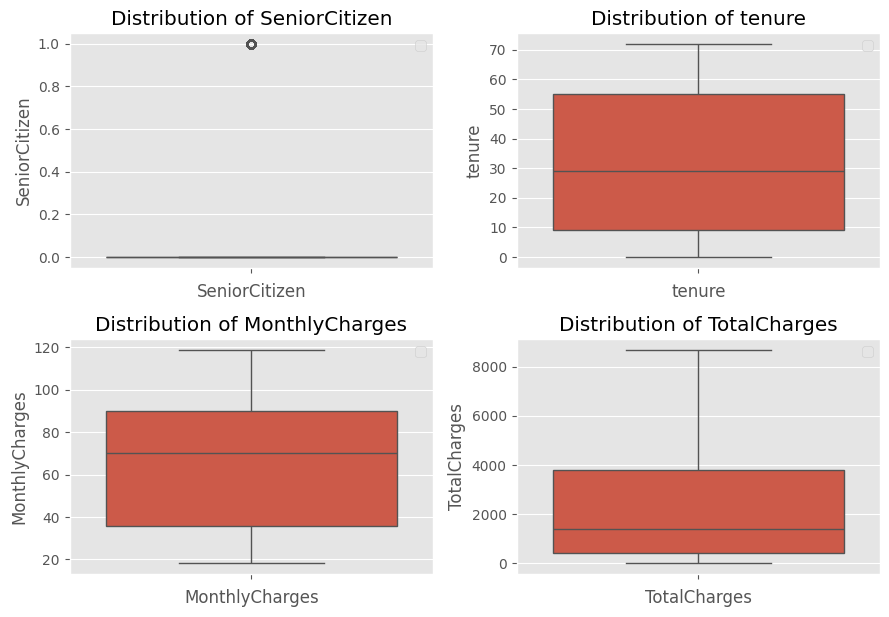

In [337]:
#  Visualize the numerical Columns.
plt.figure(figsize=(9,9))
for i, val in enumerate(dataset.describe().columns):
    plt.subplot(3,2, i + 1)
    sns.boxplot(dataset[val])
    plt.title(f"Distribution of {val}")
    plt.xlabel(val)
    plt.tight_layout()
    # #  Calculate the mean and the median Value for the Column.
    # col_mean = dataset[val].mean()
    # col_median = dataset[val].median()
    # #  Add Vertical Line for Mean and the Median.
    # plt.axvline(col_mean, color = "red", linestyle = "-", label = "Mean")
    # plt.axvline(col_median, color = "green", linestyle = "-", label = "Median")
    plt.legend()
    
plt.show()

In [338]:
#  PLot the HeatMap for the Numerical Columns.
# dataset.describe().columns
corr_labels = dataset[['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [339]:
corr_labels.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.220173,0.103006
MonthlyCharges,0.220173,1.000000,0.651174
TotalCharges,0.103006,0.651174,1.000000


<Axes: >

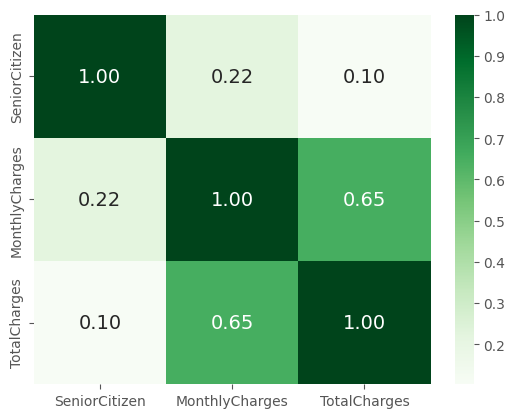

In [340]:
#  Create the Heatmap for this dataframe.
sns.heatmap(corr_labels.corr(), cmap = "Greens", annot=True, annot_kws={"size": 14}, fmt='.2f')

## Analysis and Visualization (Categorical)

In [341]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [342]:
categorical_cols = dataset.select_dtypes(include="object").columns.to_list()
categorical_cols = ["SeniorCitizen"] + categorical_cols
#  Senior Citizen is also the Binary form so we just plot the count PLot.
categorical_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [343]:
#  Countplot for the Binary and the multiclass Classification
# plt.figure(figsize=(7,9))
# for i,val in enumerate(categorical_cols):
#     plt.subplot(9,2, i + 1)
#     sns.countplot(dataset[val])
#     plt.title(f"Count Plot of {val}")
#     plt.xlabel(val)
# plt.show()



## Data Preprocessing Step

In [344]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [345]:
#  Perform the Label Encoding to the Churn Feature.
dataset.replace({"Churn": {"No": 0, "Yes": 1}}, inplace=True)

In [346]:
# dataset.head()

In [347]:
# Perform the Label Encoding rest of the Categorical Faeture into the dataset.
categorical_encoded_col = dataset.select_dtypes(include="object").columns

In [348]:
#  Perform the Encoding.
import pickle
encoder  = LabelEncoder()

for i in categorical_encoded_col:
    dataset[i] = encoder.fit_transform(dataset[i])

#  Save the Label Encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [349]:
dataset.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [350]:
#  Divide the data into the dependent and the independent Variable.
x = dataset.drop("Churn", axis=1)
y = dataset["Churn"]

In [351]:
#  Divide the data into the Training and the Testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [352]:
print(x.shape, x_train.shape, x_test.shape)

(7043, 19) (5634, 19) (1409, 19)


In [353]:
print(x_train.shape,y_train.shape)

(5634, 19) (5634,)


In [354]:
print(y_train.value_counts())

#  Still we have the Imbalanced Data into our Dataset.

Churn
0    4151
1    1483
Name: count, dtype: int64


### Handling the Imbalancing of the dataset.
Synthetic Minority Oversampling Technique (SMOTE)

In [355]:
smote = SMOTE(random_state=42)

In [356]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# save the smote.
with open("smote_tech.pkl", "wb") as f:
    pickle.dump(smote, f)

In [357]:
print(x_train_smote.shape,y_train_smote.shape)

(8302, 19) (8302,)


In [358]:
y_train_smote.value_counts()

Churn
1    4151
0    4151
Name: count, dtype: int64

## Model Training and the Implementation

In [359]:
 #  Perform the Cross Validation On the models.

models = {
    "Logistic Regression" : LogisticRegression(random_state=42),
    "K Nearest Neighbour" : KNeighborsClassifier(),
    "SVC" : SVC(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boost Classifier" : GradientBoostingClassifier(random_state=42),
    "XGB Classifier" : XGBClassifier(random_state=42)
}


In [360]:
cv_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name} with the Default Parameter")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross validation accuracy: {np.mean(scores): .2f}")
    print("-" * 50)

Training Logistic Regression with the Default Parameter
Logistic Regression cross validation accuracy:  0.80
--------------------------------------------------
Training K Nearest Neighbour with the Default Parameter
K Nearest Neighbour cross validation accuracy:  0.78
--------------------------------------------------
Training SVC with the Default Parameter
SVC cross validation accuracy:  0.65
--------------------------------------------------
Training Decision Tree Classifier with the Default Parameter
Decision Tree Classifier cross validation accuracy:  0.79
--------------------------------------------------
Training Random Forest Classifier with the Default Parameter
Random Forest Classifier cross validation accuracy:  0.84
--------------------------------------------------
Training Gradient Boost Classifier with the Default Parameter
Gradient Boost Classifier cross validation accuracy:  0.82
--------------------------------------------------
Training XGB Classifier with the Default

In [361]:
cv_scores

{'Logistic Regression': array([0.74051776, 0.76580373, 0.81987952, 0.82168675, 0.83192771]),
 'K Nearest Neighbour': array([0.75436484, 0.77603853, 0.77650602, 0.7873494 , 0.80361446]),
 'SVC': array([0.65924142, 0.64960867, 0.65120482, 0.66746988, 0.64457831]),
 'Decision Tree Classifier': array([0.69114991, 0.72907887, 0.83072289, 0.83313253, 0.84277108]),
 'Random Forest Classifier': array([0.71944612, 0.77483444, 0.88373494, 0.89216867, 0.91144578]),
 'Gradient Boost Classifier': array([0.70559904, 0.77904877, 0.85843373, 0.88072289, 0.88614458]),
 'XGB Classifier': array([0.69476219, 0.7730283 , 0.87891566, 0.89879518, 0.90542169])}

### Train the Logistic Regression Models.

In [362]:
model1 = LogisticRegression()
#  No Hyper Parameter Tuning bcoz we have less no. of arguments.
model1.fit(x_train, y_train)

LogisticRegression()

In [363]:
print(y_test.value_counts())

Churn
0    1023
1     386
Name: count, dtype: int64


In [364]:
#  Here we check the Accuracy for the model1
print(accuracy_score(model1.predict(x_train), y_train))
model1_acc = accuracy_score(model1.predict(x_test), y_test)
print(model1_acc)
print(confusion_matrix(model1.predict(x_test), y_test))
print(classification_report(model1.predict(x_test), y_test))

0.802626908058218
0.7984386089425124
[[914 175]
 [109 211]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1089
           1       0.55      0.66      0.60       320

    accuracy                           0.80      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.81      0.80      0.80      1409



### Train the K Nearest Neighbour Models.

In [370]:
model2 = KNeighborsClassifier()
#  No Hyper Parameter Tuning bcoz we have less no. of arguments.
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [371]:
#  Here we check the Accuracy for the model1
print(accuracy_score(model2.predict(x_train), y_train))
model2_acc = accuracy_score(model2.predict(x_test), y_test)
print(model2_acc)

#  Out of the 1023 the correct predicted valyue are :- 909
#  Out of the 386 the correct predicted valyue are :- 167
print(confusion_matrix(model2.predict(x_test), y_test))
print(classification_report(model2.predict(x_test), y_test))

0.8329783457578984
0.7636621717530163
[[909 219]
 [114 167]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1128
           1       0.43      0.59      0.50       281

    accuracy                           0.76      1409
   macro avg       0.66      0.70      0.67      1409
weighted avg       0.80      0.76      0.78      1409



### Train the K Nearest Neighbour Models.

In [372]:
model3 = SVC(probability=True)

# parameters = {
#     "C": [1,3,5,7],
#     "gamma" : ['scale', 'auto'],
#     "kernel": ["rbf", "linear", "poly"],
#     "degree" : [3,5,7,9],
# }
# grid_search = GridSearchCV(model3, parameters)
# grid_search.fit(x_train, y_train)
model3.fit(x_train, y_train)

SVC(probability=True)

In [373]:
#  Here we check the Accuracy for the model1
print(accuracy_score(model3.predict(x_train), y_train))
model3_acc = accuracy_score(model3.predict(x_test), y_test)
print(model3_acc)

#  Out of the 1023 the correct predicted valyue are :- 909
#  Out of the 386 the correct predicted valyue are :- 167
print(confusion_matrix(model3.predict(x_test), y_test))
print(classification_report(model3.predict(x_test), y_test))

0.7367767128150515
0.7260468417317246
[[1023  386]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84      1409
           1       0.00      0.00      0.00         0

    accuracy                           0.73      1409
   macro avg       0.50      0.36      0.42      1409
weighted avg       1.00      0.73      0.84      1409



### Train the Decision Tree Classifier Models.

In [374]:
model4 = DecisionTreeClassifier()

#  Perform the Hyperparameter Tuning.
parameters = {
    "criterion":["gini", "entropy", "log_loss"],
    "splitter": ['best', 'random'],
    "max_depth": [1,3,5,7],
    "min_samples_split":[1,2,4,],
    "min_samples_leaf": [1,2,3],
}

grid_search = GridSearchCV(model4, parameters)
grid_search.fit(x_train_smote, y_train_smote)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 4],
                         'splitter': ['best', 'random']})

In [375]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'best'}

In [376]:
grid_search.best_score_

0.8110203607929611

In [377]:
model4 = DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_leaf=3, min_samples_split=2, splitter="best")
model4.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3)

In [378]:
#  Here we check the Accuracy for the model1
print(accuracy_score(model4.predict(x_train), y_train))
model4_acc = accuracy_score(model4.predict(x_test), y_test)
print(model4_acc)

#  Out of the 1023 the correct predicted valyue are :- 909
#  Out of the 386 the correct predicted valyue are :- 167
print(confusion_matrix(model4.predict(x_test), y_test))
print(classification_report(model4.predict(x_test), y_test))

0.8164714235001775
0.7764371894960965
[[936 228]
 [ 87 158]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.86      1164
           1       0.41      0.64      0.50       245

    accuracy                           0.78      1409
   macro avg       0.66      0.72      0.68      1409
weighted avg       0.83      0.78      0.79      1409



In [379]:
# print("Hello")

### Train the Random Forest Classifier Models.

In [380]:
model5 = RandomForestClassifier()

# #  Perform the Hyperparameter Tuning.
# parameters = {
#     "criterion":["gini", "entropy"],
#     "n_estimators":[150,200],
#     "max_depth": [3,5,7],
#     "min_samples_split":[2,3],
#     "min_samples_leaf": [1,2,3],
# }

# grid_search = GridSearchCV(model5, parameters, cv=5)
# grid_search.fit(x_train_smote, y_train_smote)

In [381]:
# grid_search.best_params_

In [382]:
# grid_search.best_score_

In [383]:
model5 = RandomForestClassifier(criterion="entropy", max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=150)
model5.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=150)

In [384]:
#  Here we check the Accuracy for the model1
print(accuracy_score(model5.predict(x_train), y_train))
model5_acc = accuracy_score(model5.predict(x_test), y_test)
print(model5_acc)

#  Out of the 1023 the correct predicted valyue are :- 909
#  Out of the 386 the correct predicted valyue are :- 167
print(confusion_matrix(model5.predict(x_test), y_test))
print(classification_report(model5.predict(x_test), y_test))

0.8054668086616968
0.794180269694819
[[950 217]
 [ 73 169]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1167
           1       0.44      0.70      0.54       242

    accuracy                           0.79      1409
   macro avg       0.68      0.76      0.70      1409
weighted avg       0.84      0.79      0.81      1409



### Train the Gradient Boost Classifier Models.

In [385]:
model6 = GradientBoostingClassifier()
model6.fit(x_train, y_train)
# parameters = {
#     "loss": ['log_loss', 'exponential'],
#     "learning_rate": [0.1, 0.4,0.5],
#     "n_estimators" :[150,200],
#     "criterion":['friedman_mse', 'squared_error'],
#     "min_samples_split":[1,2,3],
#     "min_samples_leaf":[1,2],
#     "max_depth":[3,5,7],
# }

# grid_search = GridSearchCV(model, parameters)
# grid_search.fit(x_train_smote, y_train_smote)

GradientBoostingClassifier()

In [386]:
# grid_search.best_params_

In [387]:
# grid_search.best_score_

In [388]:
#  Here we check the Accuracy for the model1
print(accuracy_score(model6.predict(x_train), y_train))
model6_acc = accuracy_score(model6.predict(x_test), y_test)
print(model6_acc)

#  Out of the 1023 the correct predicted valyue are :- 909
#  Out of the 386 the correct predicted valyue are :- 167
print(confusion_matrix(model6.predict(x_test), y_test))
print(classification_report(model6.predict(x_test), y_test))

0.8267660631877884
0.8034066713981547
[[934 188]
 [ 89 198]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1122
           1       0.51      0.69      0.59       287

    accuracy                           0.80      1409
   macro avg       0.71      0.76      0.73      1409
weighted avg       0.83      0.80      0.81      1409



In [402]:
# Save the Logistic Regression Model.
import pickle

pickle.dump(model6, open("gradient_boost.pkl", "wb"))
load_the_model = pickle.load(open("gradient_boost.pkl", "rb"))
load_the_model

GradientBoostingClassifier()

### Train the XGB Classifier Models.

In [389]:
model7 = XGBClassifier()
model7.fit(x_train, y_train)

# parameters = {
#     "n_estimators": [100, 200, 300],
#     "learning_rate": [0.01, 0.05, 0.1],
#     "max_depth": [3, 5, 7],
#     "subsample": [0.7, 0.8, 1.0],
#     "colsample_bytree": [0.6, 0.8, 1.0],
#     "min_child_weight": [1, 3, 5]
# }

# grid_search = GridSearchCV(model7, parameters)
# grid_search.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [390]:
# grid_search.best_params_

In [391]:
# grid_search.best_score_

In [392]:
#  Here we check the Accuracy for the model1
print(accuracy_score(model7.predict(x_train), y_train))
model7_acc = accuracy_score(model7.predict(x_test), y_test)
print(model7_acc)

#  Out of the 1023 the correct predicted valyue are :- 909
#  Out of the 386 the correct predicted valyue are :- 167
print(confusion_matrix(model7.predict(x_test), y_test))
print(classification_report(model7.predict(x_test), y_test))

0.9416045438409656
0.7828246983676366
[[909 192]
 [114 194]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1101
           1       0.50      0.63      0.56       308

    accuracy                           0.78      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.80      0.78      0.79      1409



In [393]:
# Create the Data Frame of the Models with their Accuracy.

In [394]:
model_dataframe = pd.DataFrame(
    {"Model Name" : [
    "Logistic Regression",
    "K Nearest Neighbour",
    "SVC",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "Gradient Boost Classifier",
    "XGB Classifier"
],
     "Testing Accuracy": [
         model1_acc * 100,   model2_acc * 100,   model3_acc * 100,   model4_acc * 100,
         model5_acc * 100,   model6_acc * 100,   model7_acc * 100]})
model_dataframe

,Model Name,Testing Accuracy
0,Logistic Regression,79.843861
1,K Nearest Neighbour,76.366217
2,SVC,72.604684
3,Decision Tree Classifier,77.643719
4,Random Forest Classifier,79.418027
5,Gradient Boost Classifier,80.340667
6,XGB Classifier,78.282470


In [395]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5860,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,70.00,153.05
2458,1,1,1,0,50,1,2,1,2,0,2,0,2,2,2,1,1,105.05,5163.30
5879,1,0,1,0,33,1,0,0,2,2,0,2,0,0,2,1,3,61.05,2018.40
4708,0,0,1,1,56,1,0,0,2,2,2,0,0,0,2,1,1,61.30,3346.80
1293,1,0,1,1,67,1,2,1,0,2,2,2,2,2,2,1,0,111.20,7530.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0,0,1,0,61,1,2,1,0,0,2,2,2,2,1,1,0,103.30,6518.35
1725,0,1,0,0,17,1,2,1,0,0,0,0,2,2,0,1,2,94.20,1608.15
4079,0,0,1,0,10,1,2,1,2,0,0,0,0,0,0,1,1,78.15,765.15
2254,1,1,1,0,72,1,2,1,2,2,2,2,0,0,2,1,0,93.05,6735.05


Model Saved Successfully


In [397]:
# Make the predictive System.
prediction = model5.predict([[0,1,0,0,17,1,2,1,0,0,0,0,2,2,0,1,2,94.20,1608.15]])

prediction = model5.predict([[1,1	,1,	0,	50,	1,	2,	1,	2	,0,	2,	0,	2,	2,	2,	1,	1,	105.05,	5163.30]])

if prediction[0] == 0:
    print("The customer is not Churn Customer")
else:
    print("The customer is Churn Customer")

The customer is not Churn Customer


GradientBoostingClassifier()